In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("../app/data/borra", parse_dates=["read_at", "timestamp"], on_bad_lines="warn")
#df = pd.read_csv("../app/bat_AAA_900mAh-T1.csv", parse_dates=["read_at", "timestamp"], on_bad_lines="warn")
#df = pd.read_csv("../app/nodemcu-10_10-t1.csv")
#df = pd.read_csv("../app/led-t1.csv")

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-27 21:14:34.817939,574978,2025-02-27 21:14:34,5.088,0.01,0.05088,0.001
1,1,2025-02-27 21:14:34.918667,575078,2025-02-27 21:14:34,5.088,0.01,0.05088,0.001
2,2,2025-02-27 21:14:35.017959,575178,2025-02-27 21:14:34,5.088,0.01,0.05088,0.001
3,3,2025-02-27 21:14:35.117850,575278,2025-02-27 21:14:35,5.088,0.01,0.05088,0.001
4,4,2025-02-27 21:14:35.217919,575378,2025-02-27 21:14:35,5.088,0.01,0.05088,0.001
...,...,...,...,...,...,...,...,...
596,596,2025-02-27 21:15:34.427063,634585,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001
597,597,2025-02-27 21:15:34.519131,634677,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001
598,598,2025-02-27 21:15:34.620300,634778,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001
599,599,2025-02-27 21:15:34.720059,634878,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001


In [3]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-27 21:14:34.817939,574978,2025-02-27 21:14:34,5.088,0.01,0.05088,0.001
1,1,2025-02-27 21:14:34.918667,575078,2025-02-27 21:14:34,5.088,0.01,0.05088,0.001
2,2,2025-02-27 21:14:35.017959,575178,2025-02-27 21:14:34,5.088,0.01,0.05088,0.001
3,3,2025-02-27 21:14:35.117850,575278,2025-02-27 21:14:35,5.088,0.01,0.05088,0.001
4,4,2025-02-27 21:14:35.217919,575378,2025-02-27 21:14:35,5.088,0.01,0.05088,0.001
...,...,...,...,...,...,...,...,...
596,596,2025-02-27 21:15:34.427063,634585,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001
597,597,2025-02-27 21:15:34.519131,634677,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001
598,598,2025-02-27 21:15:34.620300,634778,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001
599,599,2025-02-27 21:15:34.720059,634878,2025-02-27 21:15:34,5.088,0.01,0.05088,0.001


Text(0.5, 1.0, 'Current')

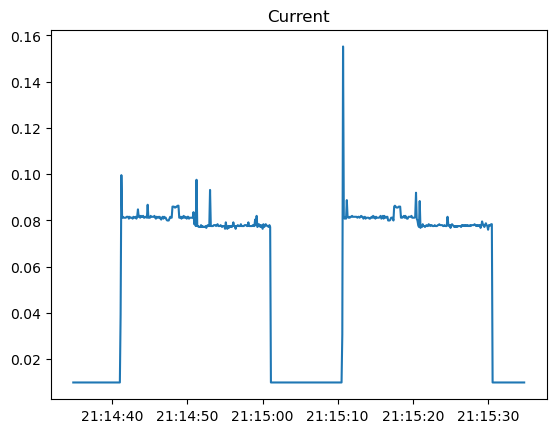

In [4]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

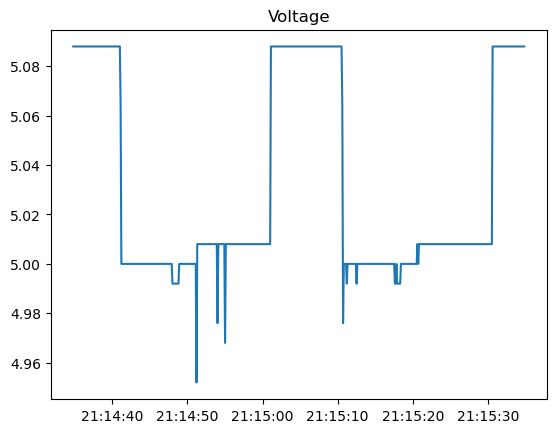

In [5]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [7]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #charge

np.float64(3.3968655657999998)

In [8]:
time_span = max(time_data)
time_span, time_span / 60, time_span / 3600

(60.002328, 1.0000388, 0.016667313333333333)

In [9]:
avg_current = total_current / time_span
avg_current

np.float64(0.05661222954216043)

In [10]:
#expected
bat_usable_cap = 0.8 #Amp hour
runtime = bat_usable_cap / avg_current
runtime #hours

np.float64(14.131222290127642)

In [11]:
#actual
act_runtime = time_span / 3600
act_bat_usable_cap = act_runtime * avg_current
act_bat_usable_cap #Ah

np.float64(0.0009435737682777777)

# etc

In [ ]:
#v = i * r
#i = v / r
v_bat = 0.94 #volts
c_bat = .8 #Ah
r = 4.5 #ohms

i  = v_bat / r
print(f"{i} A")
p = v_bat * i
print(f"{p} W")

run = c_bat / i
print(f"{run} hours")

In [ ]:
1/((1/2.3)+(1/4.7))